In [1]:
import yfinance as yf

import numpy as np
import pandas as pd

In [4]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

plt.style.use(['science', 'retro', 'grid'])

import sys
import cvxopt as opt
sys.path.insert(0, os.path.abspath('../../src/rl/dir_vec/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/base'))
sys.path.insert(2, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(3, os.path.abspath('../../src/mpt/utils'))

In [5]:
import importlib
importlib.reload(sys.modules['EfficientFrontier'])
importlib.reload(sys.modules['MarketFactory'])
importlib.reload(sys.modules['HistoricalMarketEnv'])
importlib.reload(sys.modules['HarnessVec'])
importlib.reload(sys.modules['ParallelRunnerVec'])
importlib.reload(sys.modules['DirichletPolicyVec'])

<module 'DirichletPolicyVec' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/dir_vec/DirichletPolicyVec.py'>

In [6]:
from GenerativeMarketEnv import GenerativeMarketEnv
from DirichletPolicyVec import DirichletPolicyVec
from HarnessVec import HarnessVec
from ParallelRunnerVec import ParallelRunnerVec
from EfficientFrontier import EfficientFrontier
from MarketFactory import MarketFactory

In [7]:
# stocks to consider 
stocks = ['AAPL' ,'ADBE' ,'ADI' ,'ADP' ,'ADSK' ,'AEP' ,'ALGN' ,'ALXN' ,'AMAT' ,'AMD' ,'AMGN' ,'AMZN' ,'ANSS' ,'ASML' ,'ATVI'
 ,'AVGO' ,'BIDU' ,'BIIB' ,'BKNG' ,'CDNS' ,'CDW' ,'CERN' ,'CHKP' ,'CHTR' ,'CMCSA' ,'COST' ,'CPRT' ,'CSCO' ,'CSX' ,'CTAS'
 ,'CTSH' ,'DLTR' ,'DOCU' ,'DXCM' ,'EA' ,'EBAY' ,'EXC' ,'FAST' ,'FB' ,'FISV' ,'FOX' ,'FOXA' ,'GILD' ,'GOOG' ,'GOOGL'
 ,'IDXX' ,'ILMN' ,'INCY' ,'INTC' ,'INTU' ,'ISRG' ,'JD' ,'KDP' ,'KHC' ,'KLAC' ,'LRCX' ,'LULU' ,'MAR' ,'MCHP' ,'MDLZ'
 ,'MELI' ,'MNST' ,'MRNA' ,'MRVL' ,'MSFT' ,'MTCH' ,'MU' ,'MXIM' ,'NFLX' ,'NTES' ,'NVDA' ,'NXPI' ,'OKTA' ,'ORLY' ,'PAYX'
 ,'PCAR' ,'PDD' ,'PEP' ,'PTON' ,'PYPL' ,'QCOM' ,'REGN' ,'ROST' ,'SBUX' ,'SGEN' ,'SIRI' ,'SNPS' ,'SPLK' ,'SWKS' ,'TCOM'
 ,'TEAM' ,'TMUS' ,'TSLA' ,'TXN' ,'VRSK' ,'VRSN' ,'VRTX' ,'WBA' ,'WDAY' ,'XEL' ,'XLNX' ,'ZM']

In [8]:
random.shuffle(stocks)
sampled_stocks_10 = stocks[:5]
factory = MarketFactory(sampled_stocks_10, "2020-01-01", "2021-01-01", type='historical')
market = factory.create_market()

[*********************100%***********************]  5 of 5 completed


In [13]:
params = {
    'n_assets': len(sampled_stocks_10),
    'α': 0.9,
    'α_end': 0.1,
    'start_ep': 2000, 
    'α_decay_steps': 6000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 4000
}

p = DirichletPolicyVec(*list(params.values())[:-1])
h = HarnessVec(market, p)
h.train(num_episodes=params['eps'])

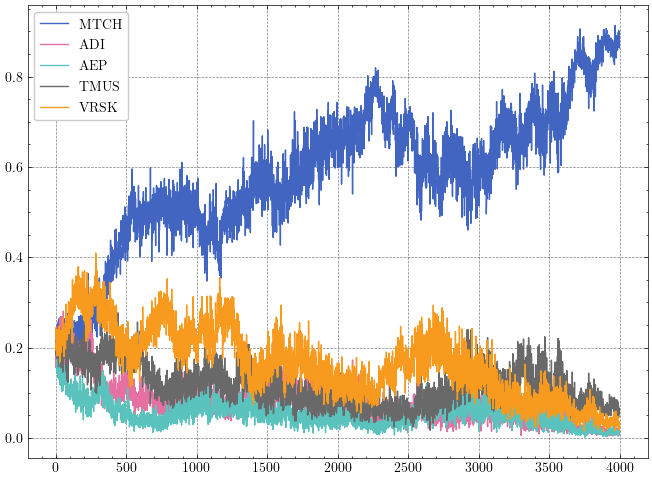

In [14]:
mean_ws = np.mean(np.array(h.hist['ws']), axis=1)
plt.figure(figsize=(8, 6), dpi=100)
for i in range(mean_ws.shape[1]):
    plt.plot(mean_ws[:,i], label=sampled_stocks_10[i])
plt.legend()

In [18]:
np.mean(market.train)

MTCH    0.002004
ADI     0.000543
AEP    -0.000337
TMUS    0.002232
VRSK    0.001380
dtype: float64

In [22]:
a_n = p.calc_an()
ws = p.act(a_n, 30)

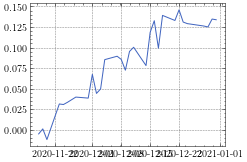

In [27]:
plt.plot(np.cumsum(np.sum(market.test*ws, axis=1)))

In [33]:
eq_ws = 0.5*np.ones((30, 5))

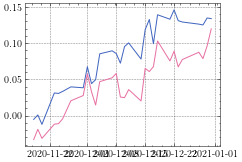

In [34]:
plt.plot(np.cumsum(np.sum(market.test*ws, axis=1)))
plt.plot(np.cumsum(np.sum(market.test*eq_ws, axis=1)))

In [93]:
random.shuffle(stocks)
sampled_stocks_10 = stocks[:20]
factory = MarketFactory(sampled_stocks_10, "2020-01-01", "2021-01-01", type='historical')
market = factory.create_market()

[*********************100%***********************]  20 of 20 completed


In [94]:
params = {
    'n_assets': len(sampled_stocks_10),
    'α': 5,
    'α_end': 0.1,
    'start_ep': 4000, 
    'α_decay_steps': 4000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 1000
}

p = DirichletPolicyVec(*list(params.values())[:-1])
h = HarnessVec(market, p)
h.train(num_episodes=params['eps'])

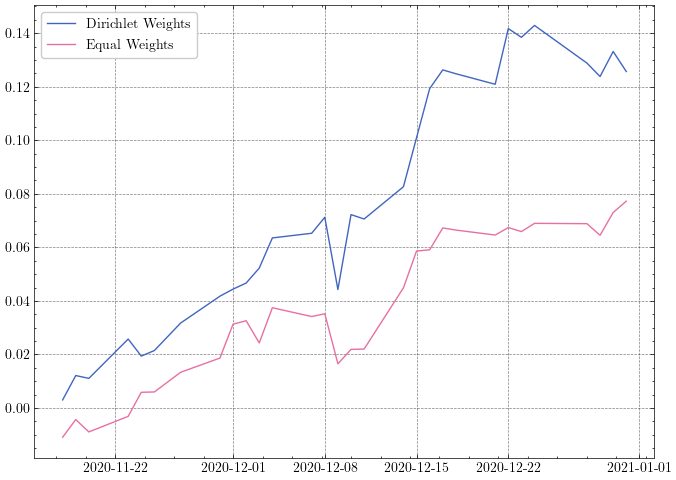

In [95]:
a_n = p.calc_an()
ws = p.act(a_n, 30)
eq_ws = (1/20)*np.ones((30, 20))
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(np.cumsum(np.sum(market.test*ws, axis=1)), label='Dirichlet Weights')
plt.plot(np.cumsum(np.sum(market.test*eq_ws, axis=1)), label='Equal Weights')
plt.legend()